In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

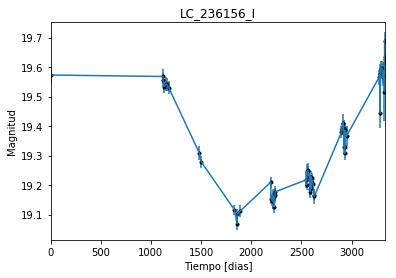

In [2]:
data = np.genfromtxt('LC_236156_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_236156_I')
plt.savefig("LC_236156_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

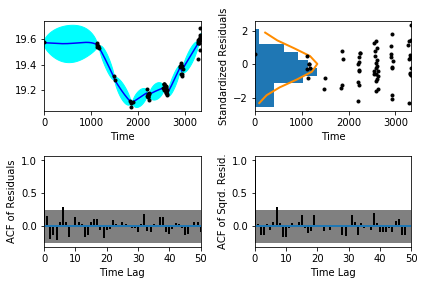

In [5]:
sample.assess_fit()

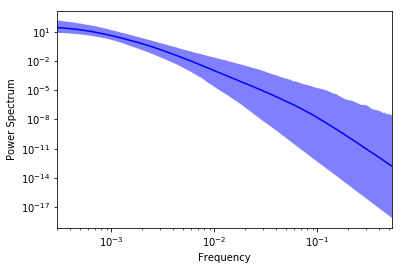

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

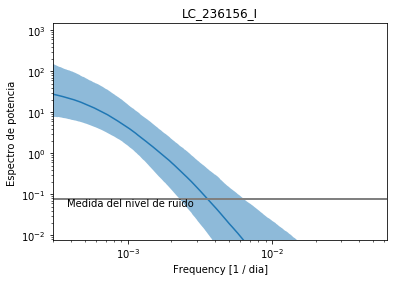

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_236156_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_236156_I')

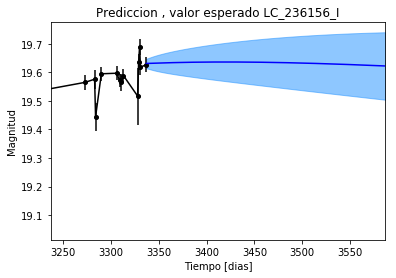

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_236156_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_236156_I')

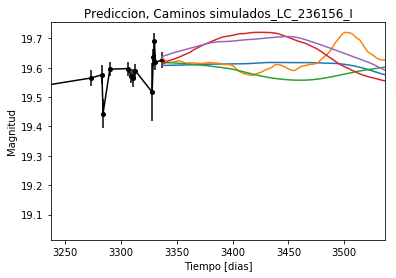

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_236156_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


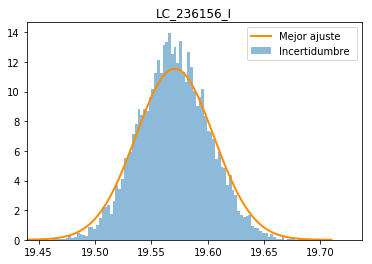

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_236156_I')
plt.savefig("Mejor_ajuste_LC_236156_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_236156_I')

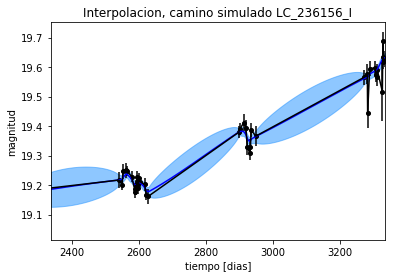

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_I')

Text(0.5,1,'Interpolacion, camino simulado LC_236156_I')

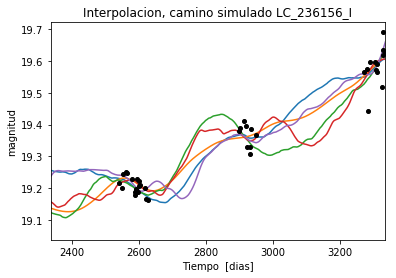

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 261.340094863
Median: 0.0177983357773
Standard deviation: 0.208912259427
68% credibility interval: [ 0.0012284   0.22135899]
95% credibility interval: [  3.58872367e-04   8.23196290e-01]
99% credibility interval: [  3.12377693e-04   1.02237986e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 732.388606558
Median: 0.00105420081982
Standard deviation: 0.0528342368683
68% credibility interval: [ 0.00038499  0.0154301 ]
95% credibility interval: [ 0.00030804  0.13637494]
99% credibility interval: [  3.01577468e-04   3.60645111e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 432.646899138
Median: 0.0168321471652
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1384.50693399
Median: 144.245696712
Standard deviation: 1.61711429805
68% credibility interval: [ 142.448684    145.35967373]
95% credibility interval: [ 139.89902538  146.0834003 ]
99% credibility interval: [ 137.71141551  146.85649864]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 478.994566019
Median: 0.783039225513
Standard deviation: 2.14545502687
68% credibility interval: [ 0.07293638  4.03116157]
95% credibility interval: [ 0.01312045  7.07213013]
99% credibility interval: [  9.07726294e-03   9.43723932e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1149.12982643
Median: 0.297828530838
Standard deviation: 8.20748079538
68% credibility interval: [ 0.01375361  6.00911978]
95% credibility interval: [  7.4

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 197.634506499
Median: 3.01874751688e-35
Standard deviation: 1.16731897792e+100
68% credibility interval: [  4.09881217e-72   9.94320522e-06]
95% credibility interval: [  6.70190516e-176   4.95975193e+016]
99% credibility interval: [  4.07592534e-182   7.94370978e+100]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1978.42383193
Median: 19.4269320369
Standard deviation: 0.133392439907
68% credibility interval: [ 19.32453036  19.55043091]
95% credibility interval: [ 19.1899996   19.73058454]
99% credibility interval: [ 19.06209829  19.90671819]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 351.934612067
Median: 0.0
Standard deviation: 0.236834546291
68% credibility interval: [ 0.          0.24066158]
95% credibility interval: [ 0.          0.89142302]
99% credibility interval: [ 0.          1.02627673]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 351.934612067
Median: 0.0
Standard deviation: 0.236834546291
68% credibility interval: [ 0.          0.24066158]
95% credibility interval: [ 0.          0.89142302]
99% credibility interval: [ 0.          1.02627673]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 538.09709368
Median: 0.0
Standard deviation: 0.000166958292864
68% credibility interval: [ 0. 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1384.50693399
Median: 144.245696712
Standard deviation: 1.61711429805
68% credibility interval: [ 142.448684    145.35967373]
95% credibility interval: [ 139.89902538  146.0834003 ]
99% credibility interval: [ 137.71141551  146.85649864]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1408.38362525
Median: 0.0449678013167
Standard deviation: 0.0636952897222
68% credibility interval: [ 0.02589519  0.09323223]
95% credibility interval: [ 0.0164891   0.21605446]
99% credibility interval: [ 0.0131446   0.41486066]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1942.33301298
Median: 1.13677048425
Standard deviation: 0.175070478576
68% credibility interval: [ 0.9812066   1.32370649]
95% credibility interval: [ 0.84470004  1.52901687]
99% credibility interval: [ 0.75943303  1.68304935]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2039.26555211
Median: 4.2797805084e-05
Standard deviation: 0.0300825279078
68% credibility interval: [  1.60584389e-06   1.19936410e-03]
95% credibility interval: [  7.30976936e-22   9.09554460e-03]
99% credibility interval: [  8.43864662e-107   6.22821381e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 261.340094863
Median: (-0.111830241848-1.0643791672j)
Standard deviation: 1.98428258879
68% credibility interval: [-1.39083956+0.j         -0.00771825-4.01603226j]
95% credibility interval: [ -5.17229483e+00+0.j          -2.25486159e-03-0.00448962j]
99% credibility interval: [ -6.42380211e+00+0.j          -1.96272693e-03-0.00146044j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 732.388606558
Median: (-0.0066237391019+0j)
Standard deviation: 1.52465422662
68% credibility interval: [-0.09695019+5.56650526j -0.00241894+0.j        ]
95% credibility interval: [-0.85686903+2.55873399j -0.00193548+0.00329587j]
99% credibility interval: [ -2.26600006e+00+4.68542393j  -1.89486712e-03+0.j        ]
Posterior summary for parame